# **REGRESSION ANALYSIS**

## **Import Library & Datasets**

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
os.environ['KAGGLE_USERNAME'] = "akmalzuhdyprasetya"
os.environ['KAGGLE_KEY'] = "3f1fd1ffa5d36294293dfb098b3b7392"

### **1. Linear Regression Dataset**

#### **Sumber dataset: https://www.kaggle.com/mirichoi0218/insurance**

In [3]:
!kaggle datasets download -d mirichoi0218/insurance

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 27.4MB/s]


In [4]:
!unzip -q /content/insurance.zip

In [5]:
data = pd.read_csv("/content/insurance.csv")
data.head(11)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
data.shape

(1338, 7)

In [8]:
# label encoding
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

In [9]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


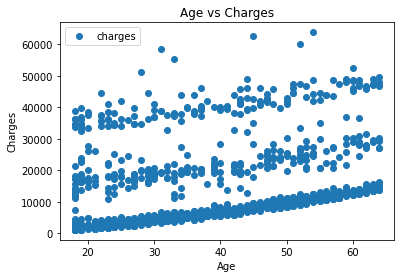

In [10]:
data.plot(x='age', y='charges', style='o')
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.style.use('dark_background')
plt.show()

In [11]:
x = data['age'].values[:, np.newaxis]
y = data['charges'].values

In [12]:
# splitting dataset into training dataset and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### **Logistic Regression Dataset**

#### **Sumber dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database**

In [13]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 14.0MB/s]


In [14]:
!unzip -q /content/pima-indians-diabetes-database.zip

In [15]:
# rename column names for obvious reason :)
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
logreg_data = pd.read_csv("/content/diabetes.csv", names=col_names, header=None)
logreg_data.head(11)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
7,3,78,50,32,88,31,0.248,26,1
8,10,115,0,0,0,35.3,0.134,29,0
9,2,197,70,45,543,30.5,0.158,53,1


In [16]:
# removing first row for another obvious reason
logreg_data = logreg_data.drop(logreg_data[logreg_data.bmi == 'BMI'].index)
logreg_data.head(11)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
7,3,78,50,32,88,31,0.248,26,1
8,10,115,0,0,0,35.3,0.134,29,0
9,2,197,70,45,543,30.5,0.158,53,1
10,8,125,96,0,0,0,0.232,54,1


In [17]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
logreg_x = logreg_data[feature_cols]
logreg_y = logreg_data.label

In [18]:
# splitting dataset into training dataset and testing dataset
logreg_x_train, logreg_x_test, logreg_y_train, logreg_y_test = train_test_split(logreg_x, logreg_y, test_size=0.2)

## **A. Linear Regression**

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
# method to show CV Mean & STD scores
def get_cv_scores(model):
    scores = cross_val_score(model, x_train, y_train, cv=10, scoring='r2')
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [21]:
# modelling
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
get_cv_scores(lr)

CV Mean:  0.0784348597079986
STD:  0.03961804779138463




In [23]:
print("Intercept :" + str(lr.intercept_))
print("Coefficient :" + str(lr.coef_))

Intercept :3389.5790144667717
Coefficient :[247.41225054]


In [24]:
# predicting
lr_y_pred = lr.predict(x_test)

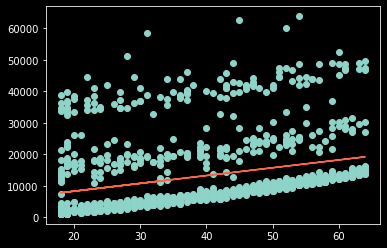

In [25]:
# plotting
plt.scatter(x_train, y_train)
plt.plot(x_test, lr_y_pred, color='tomato', linewidth=1.5)
plt.style.use('dark_background')
plt.show()

In [26]:
result_data = pd.DataFrame({
    'Actual': y_test,
    'Predicted': lr_y_pred
})
result_data.head(11)

,Actual,Predicted
0,17352.68030,8090.411775
1,21472.47880,11306.771032
2,10594.50155,16997.252794
3,2632.99200,9574.885278
4,27724.28875,8337.824025
5,26236.57997,15017.954790
6,42856.83800,15760.191542
7,39241.44200,10811.946531
8,4673.39220,11306.771032
9,27375.90478,11801.595533


In [27]:
# evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_y_pred))
print('Root Mean Absolute Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_y_pred)))

Mean Absolute Error: 9565.01081500156
Mean Squared Error: 147724433.3056919
Root Mean Absolute Error: 12154.194062367604


## **B. Logistic Regression**

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
# modelling
logreg = LogisticRegression()
logreg.fit(logreg_x_train, logreg_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
# predicting
logreg_y_pred = logreg.predict(logreg_x_test)
print(logreg_y_pred)

['0' '0' '0' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1'
 '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '1' '0' '0'
 '0' '0' '1' '0' '1' '1' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '1'
 '0' '0' '0' '1' '1' '0' '1' '1' '0' '0' '1' '1' '0' '0' '0' '0' '0' '1'
 '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0'
 '0' '0' '0' '1' '1' '1' '1' '0' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0'
 '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '1' '0' '1' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '1' '1' '0' '0' '1' '0' '0' '0' '1' '0' '1' '0' '1'
 '0' '1' '1' '1' '0' '0' '0' '0' '0' '0']


In [31]:
# create confusion matrix
logreg_conf_matrix = metrics.confusion_matrix(logreg_y_test, logreg_y_pred)
print(logreg_conf_matrix)

[[88 12]
 [16 38]]


Text(0.5, 257.44, 'Predicted label')

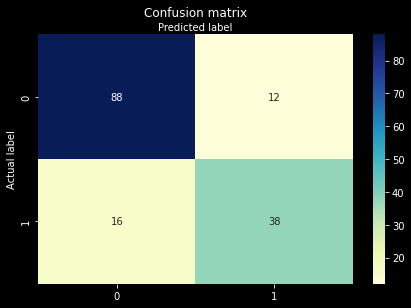

In [32]:
# showing confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(logreg_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
# evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(logreg_y_test, logreg_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(logreg_y_test, logreg_y_pred))
print('Root Mean Absolute Error:', np.sqrt(metrics.mean_squared_error(logreg_y_test, logreg_y_pred)))

Mean Absolute Error: 0.18181818181818182
Mean Squared Error: 0.18181818181818182
Root Mean Absolute Error: 0.4264014327112209
